In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import pickle
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

# What it interesting to investigate:
1. Parameter investiations
    - markov chain length
    - alpha
Strong interaction effects between these 2 - so probably should do them together
But also do individually to show illistrative effect on temperature, objective history plots


    - variations of annealing
    - clipping

# Which configurations to use


# LOAD PICKLE

In [75]:
os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")

['alpha_markov_chain1610569296.5602489.pkl',
 'alpha_markov_chain1610569870.1545694.pkl',
 'alpha_markov_chain1610571641.5611596.pkl',
 'alpha_markov_chain1610576793.1387656.pkl']

In [76]:
file = os.listdir("./Simulated_Annealing_Param_Opt/stored_data/")[-1]

In [78]:
#result_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/alpha_markov_chain1610571641.5611596.pkl", "rb"))
result_list = pickle.load(open("./Simulated_Annealing_Param_Opt/stored_data/" + file, "rb"))

In [99]:
#result_list = result_list[0:800]

In [100]:
results_df = pd.DataFrame()
for result in result_list:
    results_df = results_df.append(result, ignore_index=True)
results_df.head()

,annealing_alpha,annealing_schedule,archive_minimum_acceptable_dissimilarity,average_runtime,best_performance,best_performance_final,bound_enforcing_method,cholesky_path_length,maximum_archive_length,maximum_function_evaluations,...,mean_performance,mean_performance_final,objective_function,pertubation_method,raw_results,std_perormance,std_perormance_final,step_size_initialisation_fraction_of_range,x_bounds,x_length
0,0.600000,simple_exponential_cooling,0.2,4.304298,-1437.223572,-1437.223572,not_clipping,5.0,100.0,10000.0,...,-1082.952994,-1082.952994,<function rana_func at 0x000001206FA98670>,Cholesky,"[-758.9159663299031, -1319.2781067674598, -865...",190.923979,190.923979,0.01,"(-500, 500)",5.0
1,0.620526,simple_exponential_cooling,0.2,4.835071,-1644.708450,-1644.708450,not_clipping,5.0,100.0,10000.0,...,-1090.737406,-1090.737406,<function rana_func at 0x000001206FA98670>,Cholesky,"[-586.691148705176, -1319.2781067674598, -865....",255.524083,255.524083,0.01,"(-500, 500)",5.0
2,0.641053,simple_exponential_cooling,0.2,4.396995,-1459.148844,-1459.148844,not_clipping,5.0,100.0,10000.0,...,-1073.742973,-1073.742973,<function rana_func at 0x000001206FA98670>,Cholesky,"[-586.691148705176, -856.7238188836111, -893.1...",230.614935,230.614935,0.01,"(-500, 500)",5.0
3,0.661579,simple_exponential_cooling,0.2,3.259001,-1437.386559,-1437.386559,not_clipping,5.0,100.0,10000.0,...,-1095.822428,-1095.822428,<function rana_func at 0x000001206FA98670>,Cholesky,"[-586.691148705176, -856.7238188836111, -893.1...",230.648155,230.648155,0.01,"(-500, 500)",5.0
4,0.682105,simple_exponential_cooling,0.2,4.918164,-1437.386559,-1437.386559,not_clipping,5.0,100.0,10000.0,...,-1107.034714,-1107.034714,<function rana_func at 0x000001206FA98670>,Cholesky,"[-586.691148705176, -1001.3067032310173, -893....",225.165978,225.165978,0.01,"(-500, 500)",5.0


In [101]:
results_df.shape

(800, 21)

In [93]:
#results_df.loc[results_df["pertubation_method"] == "Cholesky"]["annealing_alpha"].unique()

In [102]:
n_markov_points = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["maximum_markov_chain_length"].unique().shape[0]
n_pertubation_points = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["annealing_alpha"].unique().shape[0]
n_markov_points, n_pertubation_points

(20, 20)

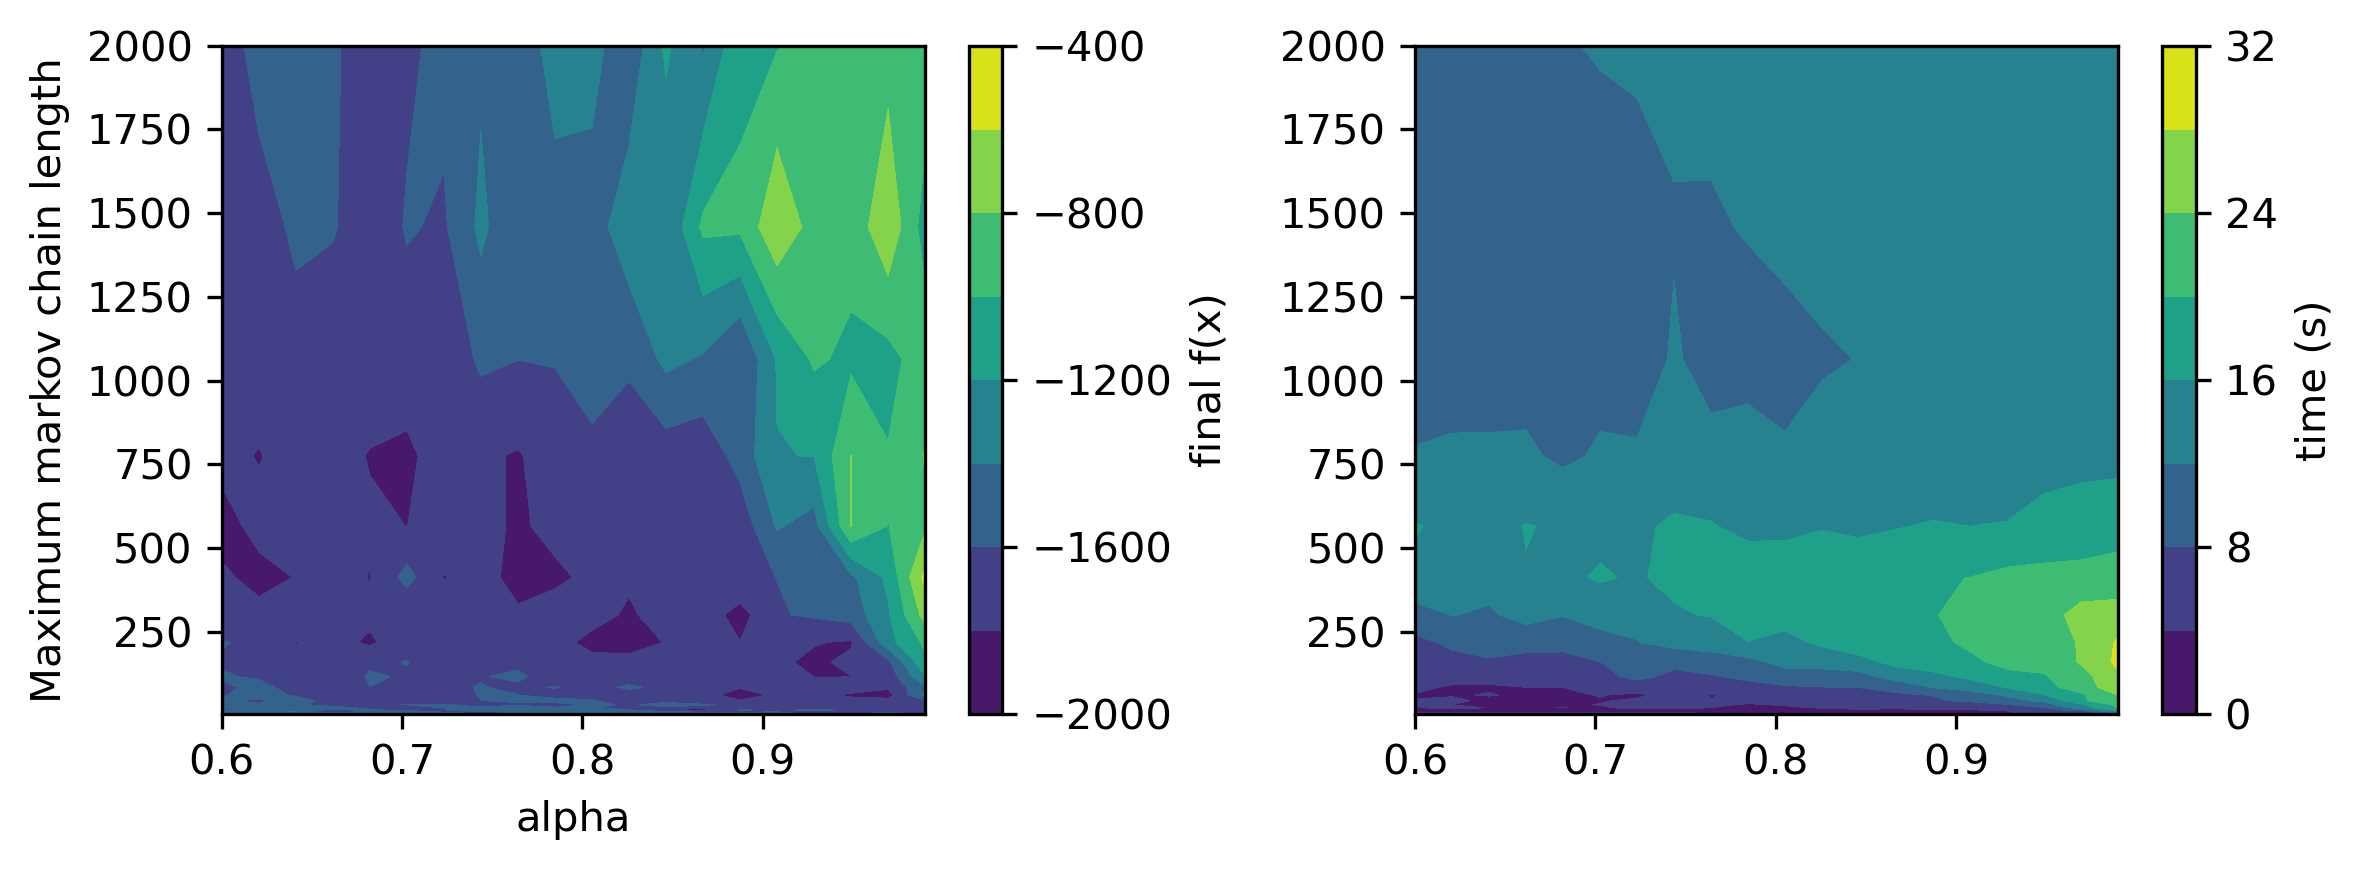

In [104]:
n_points = 20
fig, ax = plt.subplots(1,2, figsize=(8,3))
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["final f(x)", "time (s)"]
for i, column in enumerate(["best_performance_final", "average_runtime"]):
    x1 = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["annealing_alpha"].to_numpy().reshape(n_markov_points,n_pertubation_points)
    x2 = results_df.loc[results_df["pertubation_method"] == "Cholesky"]["maximum_markov_chain_length"].to_numpy().reshape(n_markov_points,n_pertubation_points)
    z = results_df.loc[results_df["pertubation_method"] == "Cholesky"][column].to_numpy().reshape(n_markov_points,n_pertubation_points)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i])
    tick_locator = mpl.ticker.MaxNLocator(nbins=4)
    CB.locator = tick_locator
    CB.update_ticks()

ax[0].set_ylabel("Maximum markov chain length")
ax[0].set_xlabel("alpha")
ax[1].set_xlabel("alpha")
fig.tight_layout()

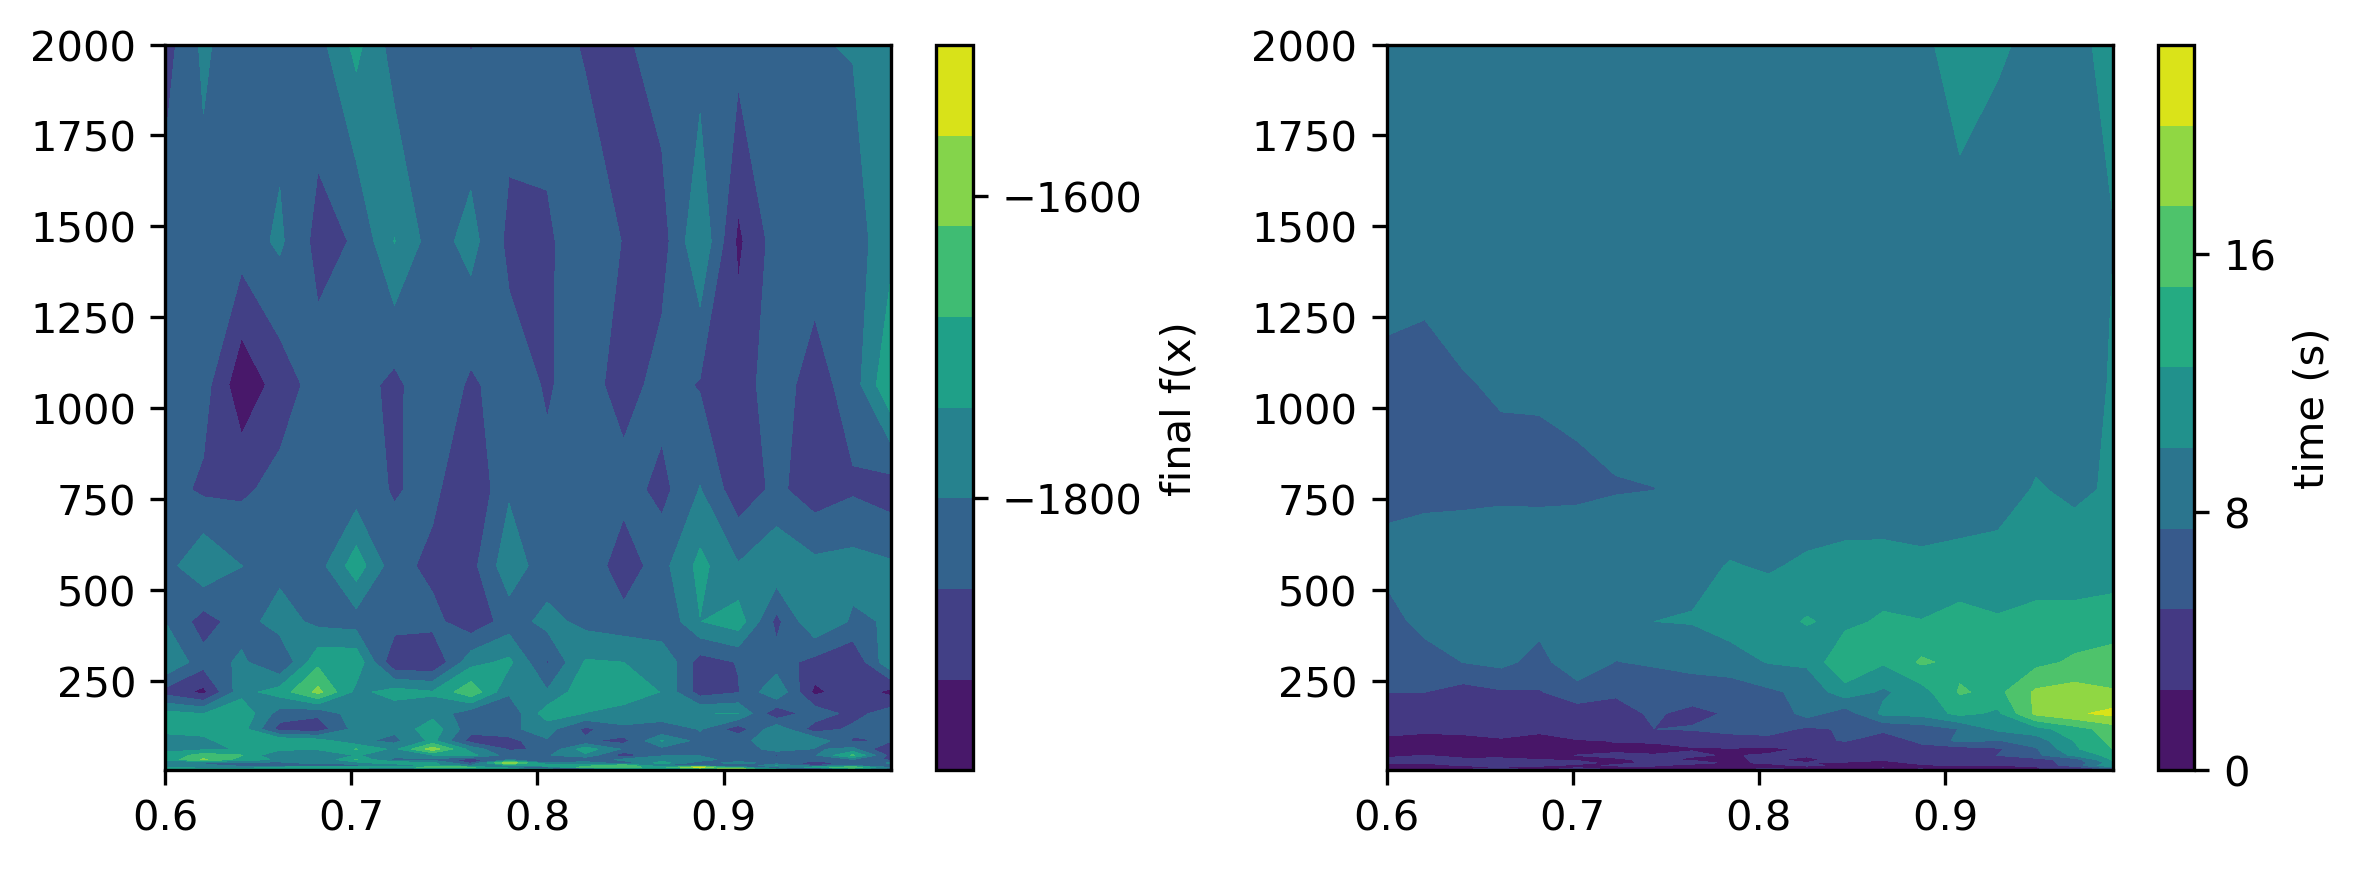

In [74]:
n_points = 20
fig, ax = plt.subplots(1,2, figsize=(8,3))
#labels = ["final f(x)", "std f(x)", "time (s)"]
#for i, column in enumerate(["best_performance_final",'std_perormance_final', "average_runtime"]):
labels = ["final f(x)", "time (s)"]
for i, column in enumerate(["best_performance_final", "average_runtime"]):
    x1 = results_df.loc[results_df["pertubation_method"] == "Diagonal"]["annealing_alpha"].to_numpy().reshape(n_points,n_points)
    x2 = results_df.loc[results_df["pertubation_method"] == "Diagonal"]["maximum_markov_chain_length"].to_numpy().reshape(n_points,n_points)
    z = results_df.loc[results_df["pertubation_method"] == "Diagonal"][column].to_numpy().reshape(n_points,n_points)
    plot_list = []
    cs = ax[i].contourf(x1,x2,z)
    CB = fig.colorbar(cs, label=labels[i], ax=ax[i])
    tick_locator = mpl.ticker.MaxNLocator(nbins=3)
    CB.locator = tick_locator
    CB.update_ticks()
fig.tight_layout()

# OLD stuff

In [ ]:
Chol_config = {"pertubation_method": "Cholesky",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.01,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

Simple_config = {"pertubation_method": "simple",
                     "x_length": 2,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

Diag_config = {"pertubation_method": "Diagonal",
                     "x_length": 5,
                     "x_bounds": (-500, 500),
                     "annealing_schedule":"simple_exponential_cooling",
                     "objective_function": rana_func,
                     "maximum_archive_length": 100,
                     "archive_minimum_acceptable_dissimilarity": 0.2,
                     "maximum_markov_chain_length": 50,
                     "maximum_function_evaluations": 10000,
                     "step_size_initialisation_fraction_of_range": 0.1,
                     "bound_enforcing_method": "not_clipping",
                     "cholesky_path_length": 5,
                    }

# markov chain

In [ ]:
def run_and_add_to_df(current_val, config, dataframe, n_runs=3, summary_stats = False):
    #try:
        results = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=config, n_iterations=n_runs)
        mean_performance = np.mean(results[:, 1])
        best_performance = np.min(results[:, 1])
        std_perormance = np.std(results[:, 1])
        average_runtime = np.mean(results[:, 2])
        config_result = config.copy()
        config_result["raw_results"] = results[:, 1]
        config_result["mean_performance"] = mean_performance
        config_result["best_performance"] = best_performance
        config_result["std_perormance"] = std_perormance
        config_result["average_runtime"] = average_runtime
        return dataframe.append(config_result, ignore_index=True)
   # except:
    #    print(f'failure for {config["pertubation_method"], current_val}'

In [ ]:
markov_chain_df = pd.DataFrame()
n_runs = 30
for maximum_markov_chain_length in np.logspace(0, np.log10(2000), 20, dtype="int"): # [5, 10, 20, 30, 40, 50, 70, 100, 200, 300, 400, 500,600, 700, 800, 900, 1000]:
        Chol_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Chol_config, markov_chain_df, n_runs=n_runs)
        Diag_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Diag_config, markov_chain_df, n_runs=n_runs)
        Simple_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        markov_chain_df = run_and_add_to_df(maximum_markov_chain_length, Simple_config, markov_chain_df, n_runs=n_runs)

In [ ]:
with open("./Simlated_Annealing_Notebooks/stored_data/markov_chain_varying.pkl", "wb") as f:
    pickle.dump(markov_chain_df, f)
#markov_chain_df = pickle.load(open("./Simlated_Annealing_Notebooks/stored_data/markov_chain_varying.pkl", "rb"))

In [ ]:
import matplotlib.patheffects as pe
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], np.stack(mini_df["raw_results"].to_numpy(), axis=0), "o",
        color=cols[i],markersize=2.5)

for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], mini_df["mean_performance"], label = pertubation_method,
            color=cols[i], markersize=2.5, linestyle="-", 
             lw=2, path_effects=[pe.Stroke(linewidth=3, foreground='g'), pe.Normal()])
plt.legend()
plt.show()
#fig.savefig("./Figures/SE5D_varying_markov_chain.png")

"""
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], mini_df["mean_performance"], label = pertubation_method,
            color=cols[i], marker="o",markersize=2.5, linestyle="-")
plt.legend()
"""
"""
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_df[markov_chain_df["pertubation_method"] == pertubation_method]
    mini_df = mini_df.sort_values(by="maximum_markov_chain_length",ascending=True)
    plt.plot(mini_df["maximum_markov_chain_length"], np.stack(mini_df["raw_results"].to_numpy(), axis=0), "o",
        color=cols[i],markersize=2.5)
"""

# Markov Chain and Annealing Alpha

In [ ]:
markov_chain_alpha_df = pd.DataFrame()
annealing_alpha_z = [0.8, 0.9, 0.95, 0.99]
n_runs = 30
for maximum_markov_chain_length in np.logspace(0, np.log10(2000), 20, dtype="int"):
    for annealing_alpha in annealing_alpha_z:
        Chol_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Chol_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Chol_config, markov_chain_alpha_df, n_runs=n_runs)
        
        Diag_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Diag_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Diag_config, markov_chain_alpha_df, n_runs=n_runs)
        
        Simple_config["maximum_markov_chain_length"] = maximum_markov_chain_length
        Simple_config["annealing_alpha"] = annealing_alpha
        markov_chain_alpha_df = run_and_add_to_df(maximum_markov_chain_length, Simple_config, markov_chain_alpha_df, n_runs=n_runs)

In [ ]:
with open("./Simlated_Annealing_Notebooks/stored_data/alphamarkov_chain_varying.pkl", "wb") as f:
    pickle.dump(markov_chain_alpha_df, f)

In [ ]:
fig, axs = plt.subplots(2,2)
for i, pertubation_method in enumerate(["Cholesky", "Diagonal", "simple"]):
    mini_df = markov_chain_alpha_df[markov_chain_alpha_df["pertubation_method"] == pertubation_method]
    for j, annealing_alpha in enumerate(annealing_alpha_z):
        row = int(j/2)
        col = j % 2
        teeny_df = mini_df[mini_df["annealing_alpha"] == annealing_alpha]
        teeny_df = teeny_df.sort_values(by="maximum_markov_chain_length",ascending=True)
        axs[row, col].plot(teeny_df["maximum_markov_chain_length"], teeny_df["mean_performance"], label = pertubation_method,
                color=cols[i], marker="o",markersize=2.5, linestyle="-")
        axs[row, col].set_title(f"alpha = {annealing_alpha}")
axs[0,0].legend()
fig.tight_layout()

# Before Optimisation

In [ ]:
results_chol = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Chol_config)
mean_performance = np.mean(results_chol[:, 1])
best_performance = np.min(results_chol[:, 1])
std_perormance = np.std(results_chol[:, 1])
average_runtime = np.mean(results_chol[:, 2])


In [ ]:
results_df = pd.DataFrame(data=[mean_performance, best_performance, std_perormance,  average_runtime], columns=["Cholsky"], index=["mean_performance", "best_performance", "std_perormance",  "average_runtime"])
results_df

In [ ]:
results_diag = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Diag_config)
mean_performance = np.mean(results_diag[:, 1])
best_performance = np.min(results_diag[:, 1])
std_perormance = np.std(results_diag[:, 1])
average_runtime = np.mean(results_diag[:, 2])
results_df["Diagonal"] = [mean_performance, best_performance, std_perormance,  average_runtime]


results_simple = multiple_runs_with_different_seed(Class=SimulatedAnnealing, class_argument=Simple_config)
mean_performance = np.mean(results_simple[:, 1])
best_performance = np.min(results_simple[:, 1])
std_perormance = np.std(results_simple[:, 1])
average_runtime = np.mean(results_simple[:, 2])
results_df["Simple"] = [mean_performance, best_performance, std_perormance,  average_runtime]
results_df

In [ ]:
maximum_markov_chain_length

In [ ]:
Chol_config